<a href="https://colab.research.google.com/github/r-doz/PML2025/blob/main/./02_numpy_pandas_sklearn/03_intro_to_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 3: Introduction to **Pyro**

Probabilistic Machine Learning -- Spring 2025, UniTS

The material in this notebook is based on the [Pyro's documentation](https://pyro.ai) and from the previous work of [Emanuele Ballarin](https://ballarin.cc).

Probabilistic programming is a **programming paradigm** that allows us to describe uncertainty and randomness in our models and data.

In traditional programming, we usually deal with **deterministic processes**, i.e. processes where *the same input always leads to the same output*, e.g. `3+5` will always return `8`.
But in many real-world problems, we deal with uncertain data or uncertain models, and that's where probabilistic programming comes in.

Imagine you're building a weather prediction system. You have data on temperature, humidity, and pressure, but you can never be completely certain about the weather. Probabilistic programming allows you to model this uncertainty in a **precise** and **formal** way. For example, if we’re predicting the chance of rain tomorrow based on uncertain weather data, **our model will return a probability distribution**, such as a 70% chance of rain.

- **random variables:** variables that represent uncertain or random quantities (e.g. the chance of rain tomorrow) - they will assume different values based on a certain probability distribution;
- **probabilistic models:** mathematical models describing uncertainty in a system (e.g. a model that predicts whether it will rain tomorrow based on past weather data) - describes how random variables interact, often built on *bayesian statistics*;
- **inference:** the process of updating our beliefs or predictions about uncertain variables based on available data, involving algorithms like Markov Chain Monte Carlo (MCMC) or variational inference - consists in obtaining *posterior distributions*.

### Practically speaking:
Probabilistic programs combine **ordinary deterministic computation** with **randomly sampled values**, representing a generative process for data.

In general, the aim is to solve an inference problem, as "what must be true if this random variable assumed a certain observed value?", following the steps:

- Specify a model
- Identify a query to be answered
- Choose an algorithm for computing the answer

## Probabilistic models in Pyro

Pyro is a:

- **deep:** allows *automatic differentiation of primitives*, making it play well with deep learning architectures
- **universal:** allows all probabilistic programs to be *correctly expressed*.

PPL based on PyTorch. This provides efficient, flexible and scalable (up to very large datasets) automatic optimisation-based inference, GPU-accelerated tensor mathematics (as with plain PyTorch), and the ability to exploit (internally or explicitly) automatic differentiation.

In [1]:
# If you run this notebook in Colab, do not forget to (uncomment and) run:
!pip install pyro-ppl
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

### Modelling / Simulation

A ***statistical model*** is a mathematical description of how some *knowns* (and what's their *form*, since they are known!) and *unknowns* (and ***how** unknown?*; see *e.g.* this [seminal work by E.T. Jaynes](https://bayes.wustl.edu/etj/articles/prior.pdf)!) generate the observed data.

The basic unit of *probabilistic programming* is a *stochastic function*, a function representing a ***generative model*** of the data indeed. In `Pyro`, any function can be viewed as a stochastic function: significantly, functions mixing deterministic Python/`PyTorch` code with *sampling primitives* are generally considered to be *proper* *stochastic function*s.

In pyro everything we define is a stochastic function.

In [3]:
#SETUP: IMPORT THE MODULES WE MAY NEED
import torch
import seaborn as sns

import pyro
import pyro.distributions as dist

### Sampling

In order to sample from a given distribution we use the `pyro.sample` function

In [5]:
pyro.sample(name="just_a_sample",
            fn=dist.Normal(loc=0, scale=1)) # loc = mean, scale = standard deviation

tensor(1.9690)

In [ ]:
# sampling multiple times
pyro.sample(name="other_samples",
            fn=dist.Normal(loc=0, scale=1),
            sample_shape=(10,))

tensor([-0.7983,  0.5863, -0.1324,  1.2526,  0.1988, -0.3740, -0.8898, -0.2044,
        -0.6930,  1.0193])

Pyro is based on PyTorch's tensors, one of the reasons is that many of its functionalities need automatic differentiation.

In [13]:
x_pyro = pyro.sample(name="other_samples",
            fn=dist.Normal(loc=0, scale=1),
            sample_shape=(10,)) # why does this change from (10,) to (10,1)

print(f"Pyro sample: {x_pyro}; type {type(x_pyro)}")

Pyro sample: tensor([-1.9969, -0.7522, -0.2540,  0.0893, -1.6478,  1.1102,  0.1925,  0.0956,
        -1.6829,  0.6752]); type <class 'torch.Tensor'>


What is the main feature of tensors?
Multi-dimensional: Tensors can represent data in multiple dimensions, similar to arrays. This allows them to store and manipulate complex data structures like images, videos, and time-series data.

GPU Acceleration: One of the key advantages of tensors is their ability to leverage GPUs for computation. This significantly speeds up operations, especially for large datasets and complex models, making them ideal for deep learning tasks.

Automatic Differentiation: Tensors support automatic differentiation, which is crucial for training neural networks. This feature allows frameworks like PyTorch to calculate gradients automatically, enabling efficient optimization of model parameters.

Numerical Operations: Tensors provide a wide range of built-in functions for numerical operations, including matrix multiplication, element-wise operations, and linear algebra routines. This simplifies mathematical computations and data manipulation.


### Defining a model

Notice that we had to specify a name when sampling, but why is it mandatory?

The point is that `pyro.sample` is not only made for sampling (for that there are simpler functions in `torch` or `numpy`), but under the hood it also keeps track of the random variables with their given names, and in general of the full generative process!

To exploit this feature we have to 'enclose' all `pyro.sample` calls inside a function that we define, representing the generative process (the model), for example:

In [14]:
def my_model():
    x = pyro.sample("x", dist.Bernoulli(0.3))
    pyro.sample("y", dist.Normal(x, 1))

The `my_model` function now represents a model of a stochastic process, in this case:

$$X \sim Bern(0.3)$$
$$Y \sim \mathcal{N}(X, 1)$$

or in other words
$$p(x,y) = p(x)p(y|x) \ \ \text{where:}$$
$$p(x) = Bern(x; 0.3)$$
$$p(y|x) \sim \mathcal{N}(y | \mu = x, \sigma = 1)$$

We basically define a nested distribution.
Pyro has functions that can take `my_model` as input and do very useful things.

This is an example of one of these functionalities: we can plot the graphical model representing the stochastic process we defined:

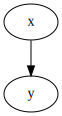

In [18]:
pyro.render_model(my_model)

# For this you need to install graphviz:
# sudo apt install graphviz
# pip install graphviz

The above is the probabilistic graph linked to our model.


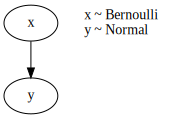

In [19]:
pyro.render_model(my_model, render_distributions=True)

Plotting a Bayesian network is not the most useful thing you can do with pyro, but it shows you that pyro is able to understand the model from the code you write inside a function.

**Inference** is actually the point of using a PPL as pyro, but in this lesson we will mostly limit ourselves to sampling, since you have still to learn about **approximate inference**.

**Example: the *exam grade stochastic model***

A **very false** (but probably didactically useful) model for the grade of an exam is the following:

The grade of an exam (in tenths) depends on the difficulty of the exam and on the knowledge of the student, according to the following model:

$$\text{difficulty}\sim\text{Bern(0.5)}$$  
$$\text{knowledge}\sim\text{Bern(0.3)}$$  
$$\text{grade} \sim \mathcal{N}(\mu = 4\cdot\text{knowledge}-2\cdot\text{difficulty}+4,\sigma = 1)$$  

We can easily implement this model in `Pyro`:

In [25]:
def describe_grade():
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))
    is_hard = "hard" if difficulty.item() == 1.0 else "easy"

    knowledge = pyro.sample("knowledge", dist.Bernoulli(0.3))
    is_knowledgeable = "knowledgeable" if knowledge.item() == 1.0 else "not knowledg."

    mu = 4 * knowledge - 2 * difficulty + 4
    grade = pyro.sample("grade", dist.Normal(loc=mu, scale=1))

    print(f"{is_hard} exam + {is_knowledgeable} student -> grade = {grade}")



In [26]:
# generate probability values from the distribution
for _ in range(10):
    describe_grade()

hard exam + not knowledg. student -> grade = 2.003199577331543
easy exam + not knowledg. student -> grade = 4.142968654632568
hard exam + not knowledg. student -> grade = 1.3641856908798218
hard exam + not knowledg. student -> grade = 4.222259521484375
easy exam + not knowledg. student -> grade = 3.1502432823181152
easy exam + not knowledg. student -> grade = 3.203984260559082
easy exam + not knowledg. student -> grade = 4.792539119720459
hard exam + knowledgeable student -> grade = 5.510178089141846
hard exam + knowledgeable student -> grade = 7.128554821014404
easy exam + not knowledg. student -> grade = 5.966691017150879


We can use pyro to plot the bayesian net corresponding to a model we defined.:

hard exam + knowledgeable student -> grade = 6.768477439880371


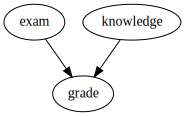

In [27]:
pyro.render_model(describe_grade) # in order to draw the model we need to sample again

We can also compute the likelihood of samples:

In [33]:
def compute_likelihood(model, *args):
    return torch.exp(pyro.poutine.trace(model).get_trace(*args).log_prob_sum()).item()

print('sample likelihood:', compute_likelihood(describe_grade))

easy exam + not knowledg. student -> grade = 3.0833616256713867
sample likelihood: 0.09173295646905899


This is probably not really useful by itself, but the possibility to compute the likelihood is fundamental for most inference techniques (just think about maximum likelihood estimation).

**Example: weather**

In [34]:
def weather():# -> dict[str, Any]:
    is_cloudy = pyro.sample("cloudy", dist.Bernoulli(0.3))
    weather = "cloudy" if is_cloudy.item() == 1.0 else "sunny"

    loc_temp = 12.0 if weather == "cloudy" else 23.00
    scale_temp = 5.0 if weather == "cloudy" else 6.00
    temp = pyro.sample("temp", dist.Normal(loc_temp, scale_temp))
    return {"weather": weather, "temp": temp.item()}

for _ in range(5):
    print(weather())

{'weather': 'sunny', 'temp': 23.74595832824707}
{'weather': 'sunny', 'temp': 29.148513793945312}
{'weather': 'sunny', 'temp': 24.332351684570312}
{'weather': 'cloudy', 'temp': 1.6114625930786133}
{'weather': 'sunny', 'temp': 17.395214080810547}


Additionally, we could use this stochastic function to model the sales of ice cream based on the weather.

In [35]:
def ice_cream_sales():
    is_cloudy, temp = weather()
    expected_sales = 200.0 if (is_cloudy == 1 and temp > 35.0) else 20.0
    sales = pyro.sample("ice_cream", pyro.distributions.HalfNormal(expected_sales, 10.0))
    return sales.item()

for _ in range(5):
    print(ice_cream_sales())

19.992782592773438
4.843769550323486
10.649709701538086
21.23023223876953
4.479503154754639


This represents the following model
$$p(\text{cloudy}, \text{temp}, \text{ice cream sales}) = p(\text{ice cream sales} |  \text{temp}, \text{cloudy})p( \text{temp} | \text{cloudy})p(\text{cloudy})$$
We can find any marginal as $p(\text{ice cream sales})$ by simulation (instead of by marginalization). It is sufficient to get enough samples and look at the histogram of ice_cream_sales:

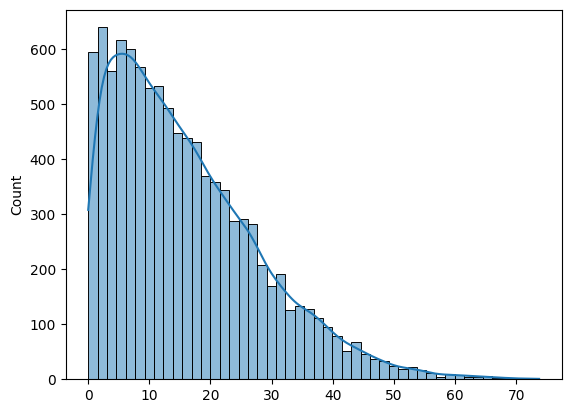

In [36]:
n = 10_000
samples = [ice_cream_sales() for _ in range(n)]
_ = sns.histplot(samples, kde=True)

We plot the probability distribution, a one sided normal. We observe e.g the value 10 600 times, and other more extreme values much more infrequently.

Quite slow, right?

### Observed values

Let's consider again the exam grade model.

The `pyro.sample` method accepts also a `obs` argument, this can be used to tell the model that you have observed a value for that random variable. As a result of this, the output will be exactly the given observations (unless `obs=None`). What's the point of this? Again, this is something useful for **inference**, but here we can just check that pyro is able to recognize it.

In [37]:
def describe_grade(obs=None):
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))
    is_hard = "hard" if difficulty.item() == 1.0 else "easy"

    knowledge = pyro.sample("knowledge", dist.Bernoulli(0.3))
    is_knowledgeable = "knowledgeable" if knowledge.item() == 1.0 else "not knowledg."

    mu = 4 * knowledge - 2 * difficulty + 4
    grade = pyro.sample("grade", dist.Normal(loc=mu, scale=1), obs=obs) # HERE!

    print(f"{is_hard} exam + {is_knowledgeable} student -> grade = {grade}")

describe_grade()

easy exam + knowledgeable student -> grade = 9.84670639038086


easy exam + not knowledg. student -> grade = 5.652338027954102


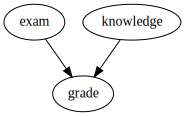

In [38]:
pyro.render_model(describe_grade) #obs is None by default

easy exam + not knowledg. student -> grade = 10.0


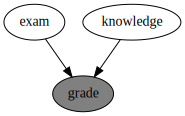

In [39]:
pyro.render_model(describe_grade, model_args=(torch.tensor(10.0),))

Sampling doesn't make sense anymore, since the value of the observed variable is fixed, but the other random variables don't change accordingly!

In [40]:
describe_grade(obs=None) # this is ok

easy exam + not knowledg. student -> grade = 5.652338027954102


In [41]:
describe_grade(obs=torch.tensor(60.0)) # this is not ok, you can see the warning (max = 10)

easy exam + not knowledg. student -> grade = 60.0


/usr/local/lib/python3.11/dist-packages/pyro/primitives.py:163: RuntimeWarning: trying to observe a value outside of inference at grade
  warnings.warn(


Observed values are mostly useful for **inference**, but here we show an example of likelihood computation exploiting observed values:

In [ ]:
def parametric_model(obs_x=None, obs_y=None):
    x = pyro.sample("x", dist.Bernoulli(0.2), obs=obs_x)
    pyro.sample("y", dist.Bernoulli(0.6*x), obs=obs_y)

In [ ]:
for x in (0.0, 1.0): # tuple, x/y are either 0 or 1
    for y in (0.0, 1.0):
        likelihood = round(compute_likelihood(parametric_model, torch.tensor(x), torch.tensor(y)),3)
        print(f"p(x={int(x)},y={int(y)})={likelihood}")

p(x=0,y=0)=0.8
p(x=0,y=1)=0.0
p(x=1,y=0)=0.08
p(x=1,y=1)=0.12


(0, 0) has a high likelihood: our model is built on a bernoulli with 0.2 probability.
(0, 1) instead has an extremely low value: y is dependent on X (0 comes out with 0.2 prob), so it's extremely unlikely that it deviates this much (with a 1 coming out of it, given that X was actually 0).

### Multiple samples

Considering the exam-grad model, suppose that the exam is taken by several students and that we want to model this aspect.
A simple way to do this is to sample the variables `knowledge` and `grade` many times using a loop:

In [42]:
def describe_grade():
    N = 10
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))

    grades = torch.zeros(N)
    for i in range(N):
        knowledge = pyro.sample(f"knowledge_{i}", dist.Bernoulli(0.3))
        mu = 4 * knowledge - 2 * difficulty + 4
        grades[i] = pyro.sample(f"grade_{i}", dist.Normal(loc=mu, scale=1))

    return grades

In [43]:
print("grades: ", describe_grade())

grades:  tensor([3.9485, 3.2933, 3.3091, 3.0791, 3.9829, 5.7218, 4.4431, 8.5601, 2.0183,
        3.4108])


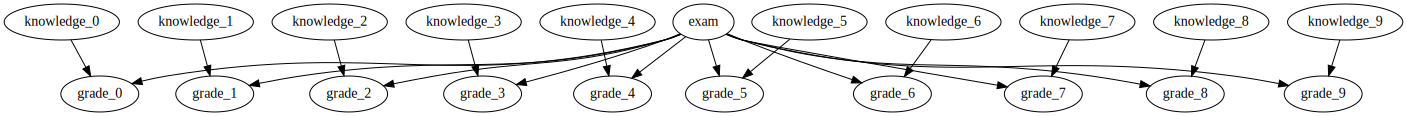

In [44]:
pyro.render_model(describe_grade)

This can work when the number of conditionally independent repetitions is relatively small. Instead, when there are many repetitions, there is a more compact and efficient way to define this behavior: `pyro.plate`

Everything that is defined inside the `pyro.plate` context manager, is automatically vectorized and conditionally independent:

In [45]:
def describe_grade_plate():
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))

    with pyro.plate("N", 10):
        knowledge = pyro.sample("knowledge", dist.Bernoulli(0.3))
        mu = 4 * knowledge - 2 * difficulty + 4
        grade = pyro.sample(f"grade", dist.Normal(loc=mu, scale=1))

    return grade

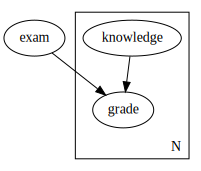

In [46]:
pyro.render_model(describe_grade_plate)

In [47]:
print("grades: ", describe_grade_plate())

grades:  tensor([3.8840, 9.6912, 6.1424, 3.5515, 3.8724, 9.1924, 6.9579, 2.8706, 3.4751,
        7.0387])


Notice that the model is the same, but the graphical model uses the plate notation to represent conditionally independent variables.

Here we show an example were the grades are observed.
The problem here could be to infer the knowledge of each student or the difficulty of the exam:

In [48]:
def describe_grade_plate(observed_grades):
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))

    with pyro.plate("N", len(observed_grades)):
        knowledge = pyro.sample("knowledge", dist.Bernoulli(0.3))
        mu = 4 * knowledge - 2 * difficulty + 4
        grade = pyro.sample(f"grade", dist.Normal(loc=mu, scale=1), obs=observed_grades)

    return grade

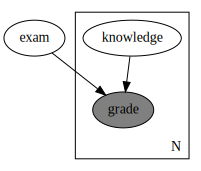

In [49]:
observed_grades = torch.tensor([5.0, 6.0, 7.0, 8.0, 9.0])

pyro.render_model(describe_grade_plate, model_args=(observed_grades, ))

We thus try to infer the student's knowledge based on the grade.

There is also another option for dealing with multiple samples: sampling arrays.

grades:  tensor([3.0597, 8.5044, 3.6228, 4.3101, 5.0127, 4.8298, 5.2443, 5.5498, 7.1570,
        3.9773])


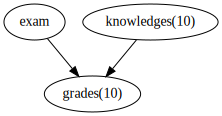

In [50]:
def describe_grade_array(n: int):
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5))
    knowledge = pyro.sample(f"knowledges({n})", dist.Bernoulli(0.3), sample_shape=(n,))
    mu = 4 * knowledge - 2 * difficulty + 4
    grade = pyro.sample(f"grades({n})", dist.Normal(loc=mu, scale=1))

    return grade

print("grades: ", describe_grade_array(10))

pyro.render_model(describe_grade_array, model_args=(10, ))

But the graphical model is not really transparent! This graph doesn't contain the information that each couple (knowledge, grade) is conditionally independent from others.

Anyway, we can use the plate or arrays allows to sample in a more efficiet way:

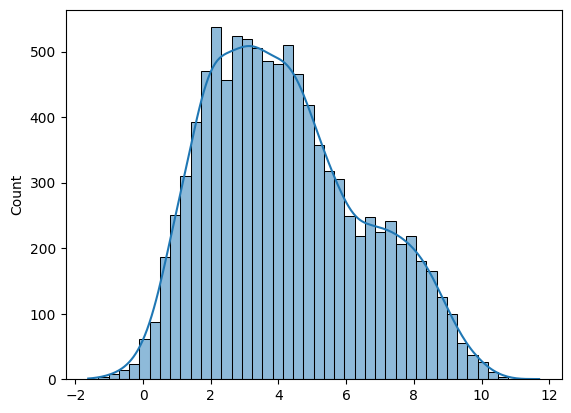

In [51]:
def describe_grade_array(n: int):
    difficulty = pyro.sample("exam", dist.Bernoulli(0.5), sample_shape=(n,))
    knowledge = pyro.sample(f"knowledges({n})", dist.Bernoulli(0.3), sample_shape=(n,))
    mu = 4 * knowledge - 2 * difficulty + 4
    grade = pyro.sample(f"grades({n})", dist.Normal(loc=mu, scale=1))

    return grade

grades = describe_grade_array(10000)
_ = sns.histplot(grades, kde=True)

### Parameters

Pyro supports also the definition of (named) parameters, that sometimes appear when defining a model.
For example, they are used when defining a prametric model and we are interested in fitting it to observed data by maximum likelihood estimation (MLE). However, these are not used when following a purely probabilistic (bayesian) approach.

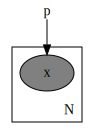

In [53]:
import pyro.distributions.constraints as constraints

def parametric_model(obs):
    p = pyro.param(name='p',
                   init_tensor=torch.tensor(0.5),
                   constraint=constraints.unit_interval)
    with pyro.plate("N"):
        x = pyro.sample("x", dist.Bernoulli(p), obs = obs, constraint = constraints.unit_interval)
    return x

obs = torch.tensor([0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1]).float()
pyro.render_model(parametric_model, render_params=True, model_args=(obs,))

Notice that we can specify the bounds of a parameter: `constraint=constraints.unit_interval`. This information will be exploited during optimization.

### A funny behavior...

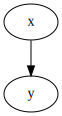

In [54]:
def parametric_model(obs_x=None, obs_y=None):
    x = pyro.sample("x", dist.Bernoulli(0.2), obs=obs_x)
    y = pyro.sample("y", dist.Bernoulli(0.6*x), obs=obs_y).item()

pyro.render_model(parametric_model)

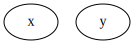

In [55]:
def parametric_model(obs_x=None, obs_y=None):
    x = pyro.sample("x", dist.Bernoulli(0.2), obs=obs_x).item()
    y = pyro.sample("y", dist.Bernoulli(0.6*x), obs=obs_y).item()

pyro.render_model(parametric_model)

if we pass the 2 random variables as integers the causality disappears.

### Summary

Now we can consider probabilistic models, represented by a standard graphical notation and convert them in Pyro models with the following primitive functions:

- latent random variables -> **pyro.sample**
- observed random variables -> **pyro.sample** with **obs** keyword argument
- plates (sets of conditionally independent variables) -> **pyro.plate**
- learnable parameters -> **pyro.param**

For example, we can write the model in the image above assuming the following distibutions:

- $\alpha \sim Normal(2,1)$
- $\beta \sim Normal(1,1)$
- $\sigma_y \sim HalfNormal(0.5,1)$
- $x_i \sim Normal(0,1)$ with observed data, N independent samples
- $y_i \sim Normal(\alpha * \beta + x, \sigma_y)$ with observed data, N independent samples

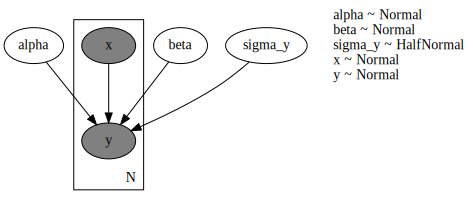

In [56]:
def parametric_model(x_data, y_data):
    alpha = pyro.sample('alpha', dist.Normal(2,1))
    beta = pyro.sample('beta', dist.Normal(1,1))
    sigma_y = pyro.sample('sigma_y', dist.HalfNormal(0.5,1))
    with pyro.plate("N", len(x_data)):
        x = pyro.sample("x", dist.Normal(0,1), obs=x_data)
        pyro.sample("y", dist.Normal(alpha*beta + x, sigma_y), obs=y_data)

# OBSERVED DATA
data_x = torch.tensor((0, 0.2, 0.1, 0.3, 0, 0.1, 0.2, -0.1, -0.3, 0))
data_y = torch.tensor((2,3,2.5,1.5,0,1.5,1,2.3,3,2.8))

# VISUALIZE THE MODEL
pyro.render_model(parametric_model, model_args=(data_x,data_y,), render_params=True ,render_distributions=True)